## importando os dados


In [1]:
import pandas as pd
import numpy as np

# Simulando um dataset fictício de vendas de e-commerce com 20 produtos
data = {
    'order_id': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020],
    'produto': ['Laptop', 'Telefone', 'Tablet', 'Fones de Ouvido', 'Teclado', 'Mouse', 'Monitor', 'Impressora', 'Câmera', 'Smartwatch',
                'Drone', 'Carregador', 'Pen Drive', 'Caixa de Som', 'Controle', 'Microfone', 'SSD', 'Cabo HDMI', 'Fonte de Alimentação', 'Modem'],
    'categoria': ['Eletrônicos', 'Eletrônicos', 'Eletrônicos', 'Acessórios', 'Acessórios', 'Acessórios', 'Eletrônicos', 'Acessórios', 'Eletrônicos', 'Eletrônicos',
                  'Eletrônicos', 'Acessórios', 'Acessórios', 'Acessórios', 'Acessórios', 'Acessórios', 'Eletrônicos', 'Acessórios', 'Acessórios', 'Eletrônicos'],
    'quantidade': [1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 3, 4, 1, 2, 1, 2, 3, 1, 1],
    'preço': [1200, 800, 300, 150, 100, 50, 500, 300, 700, 250, 1200, 50, 30, 100, 80, 150, 200, 20, 100, 400],
    'data_pedido': ['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-03', '2023-09-04', '2023-09-05', '2023-09-05', '2023-09-06', '2023-09-06', '2023-09-07',
                    '2023-09-08', '2023-09-08', '2023-09-09', '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-11', '2023-09-12', '2023-09-13', '2023-09-13'],
    'cliente': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack', 'Kathy', 'Leo', 'Mike', 'Nina', 'Oscar', 'Paul', 'Quinn', 'Rachel', 'Sam', 'Tom'],
    'país': ['EUA', 'EUA', 'Canadá', 'Canadá', 'EUA', 'Reino Unido', 'EUA', 'Canadá', 'Reino Unido', 'EUA', 'Canadá', 'EUA', 'EUA', 'Reino Unido', 'EUA', 'Canadá', 'Reino Unido', 'EUA', 'Canadá', 'EUA']
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Exibindo o DataFrame original
print(df)

# Verificando e removendo duplicatas (se houver)
df = df.drop_duplicates()

# Verificando valores nulos
print(df.isnull().sum())  # Não há valores nulos neste dataset fictício

# Convertendo a coluna 'data_pedido' para datetime
df['data_pedido'] = pd.to_datetime(df['data_pedido'])

# Exibindo o DataFrame após a conversão
print(df.dtypes)

# Exemplo de tratamento de valores incorretos (se necessário)
df['quantidade'] = df['quantidade'].apply(lambda x: np.abs(x))

# Exibindo o DataFrame limpo
print(df)


    order_id               produto    categoria  quantidade  preço  \
0       1001                Laptop  Eletrônicos           1   1200   
1       1002              Telefone  Eletrônicos           2    800   
2       1003                Tablet  Eletrônicos           1    300   
3       1004       Fones de Ouvido   Acessórios           3    150   
4       1005               Teclado   Acessórios           2    100   
5       1006                 Mouse   Acessórios           1     50   
6       1007               Monitor  Eletrônicos           2    500   
7       1008            Impressora   Acessórios           1    300   
8       1009                Câmera  Eletrônicos           1    700   
9       1010            Smartwatch  Eletrônicos           1    250   
10      1011                 Drone  Eletrônicos           2   1200   
11      1012            Carregador   Acessórios           3     50   
12      1013             Pen Drive   Acessórios           4     30   
13      1014        

In [2]:
# Calculando o total de vendas (quantidade * preço)
df['vendas'] = df['quantidade'] * df['preço']

# Estatísticas descritivas básicas
estatisticas_descritivas = df['vendas'].describe()
print(estatisticas_descritivas)

# Calculando média, desvio padrão, mínimo e máximo das vendas
media_vendas = df['vendas'].mean()
desvio_padrao_vendas = df['vendas'].std()
min_vendas = df['vendas'].min()
max_vendas = df['vendas'].max()

print(f"Média de vendas: {media_vendas}")
print(f"Desvio padrão das vendas: {desvio_padrao_vendas}")
print(f"Vendas mínimas: {min_vendas}")
print(f"Vendas máximas: {max_vendas}")


count      20.000000
mean      504.500000
std       610.249949
min        50.000000
25%       142.500000
50%       275.000000
75%       512.500000
max      2400.000000
Name: vendas, dtype: float64
Média de vendas: 504.5
Desvio padrão das vendas: 610.2499487914768
Vendas mínimas: 50
Vendas máximas: 2400


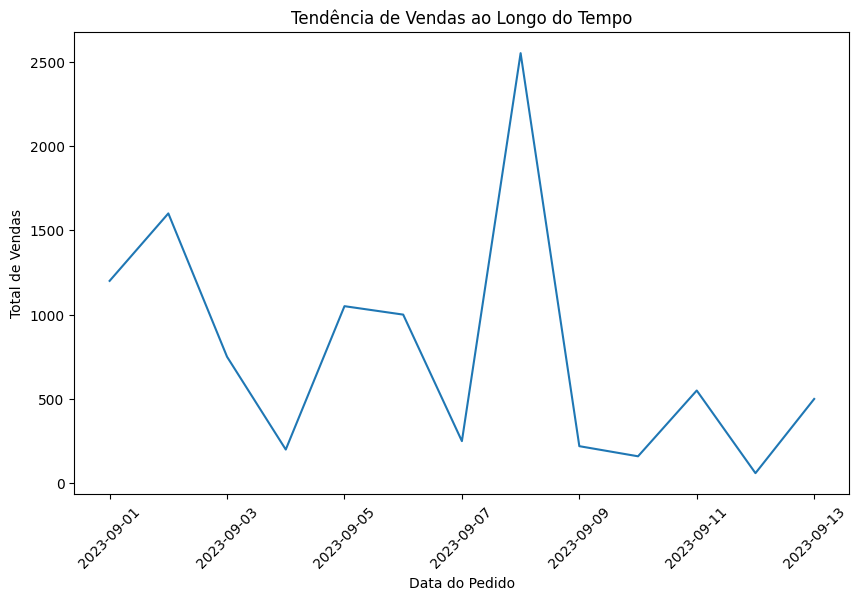

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupando as vendas por data do pedido
vendas_por_data = df.groupby('data_pedido')['vendas'].sum().reset_index()

# Criando o gráfico de linha de vendas ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='data_pedido', y='vendas', data=vendas_por_data)
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()


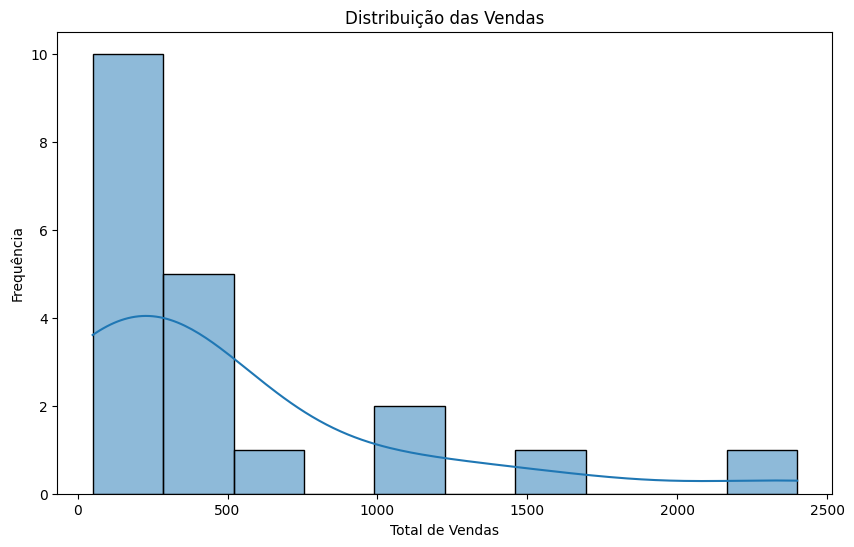

In [4]:
# Criando um histograma para ver a distribuição das vendas
plt.figure(figsize=(10, 6))
sns.histplot(df['vendas'], bins=10, kde=True)
plt.title('Distribuição das Vendas')
plt.xlabel('Total de Vendas')
plt.ylabel('Frequência')
plt.show()


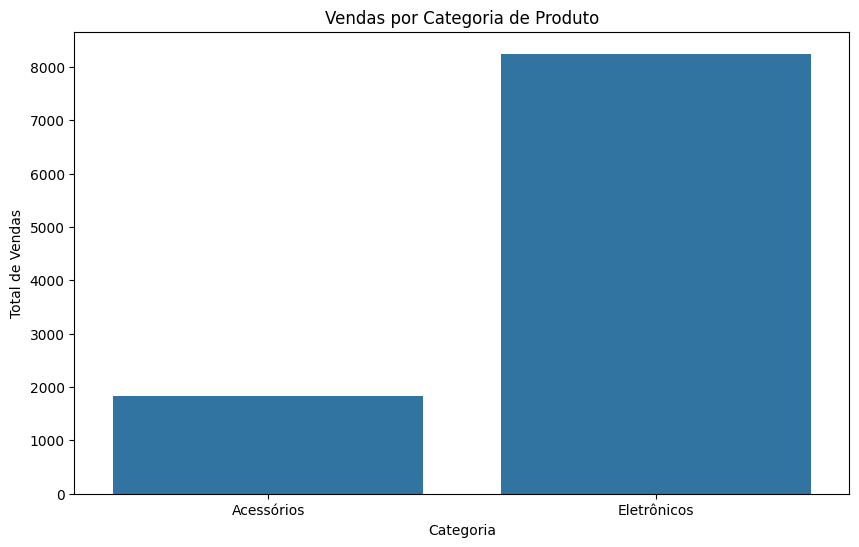

In [5]:
# Agrupando as vendas por categoria de produtos
vendas_por_categoria = df.groupby('categoria')['vendas'].sum().reset_index()

# Criando um gráfico de barras para vendas por categoria
plt.figure(figsize=(10, 6))
sns.barplot(x='categoria', y='vendas', data=vendas_por_categoria)
plt.title('Vendas por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.show()

In [10]:
from scipy import stats

# Agrupando os dados por categorias de produtos
eletronicos = df[df['categoria'] == 'Eletrônicos']['vendas']
acessorios = df[df['categoria'] == 'Acessórios']['vendas']

# Realizando o teste ANOVA para comparar as médias entre as categorias
f_stat, p_value = stats.f_oneway(eletronicos, acessorios)

# Exibindo os resultados do teste
print(f"Estatística F: {f_stat}")
print(f"P-valor: {p_value}")

# Verificando se rejeitamos ou não a hipótese nula
alpha = 0.05  # Nível de significância de 5%
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre as vendas das categorias.")
else:
    print("Falhamos em rejeitar a hipótese nula. Não há diferença significativa entre as vendas das categorias.")


Estatística F: 11.648021543149786
P-valor: 0.0031014672213134555
Rejeitamos a hipótese nula. Há uma diferença significativa entre as vendas das categorias.


In [11]:
# Exemplo do Teste t de Student para comparar Eletrônicos e Acessórios
t_stat, p_value_t = stats.ttest_ind(eletronicos, acessorios)

print(f"Estatística T: {t_stat}")
print(f"P-valor: {p_value_t}")

if p_value_t < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre as vendas de Eletrônicos e Acessórios.")
else:
    print("Falhamos em rejeitar a hipótese nula. Não há diferença significativa entre as vendas de Eletrônicos e Acessórios.")


Estatística T: 3.4129197973509107
P-valor: 0.0031014672213134625
Rejeitamos a hipótese nula. Há uma diferença significativa entre as vendas de Eletrônicos e Acessórios.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Supondo que já temos a coluna 'vendas' (quantidade * preço)

# Convertendo a coluna 'categoria' e 'país' para valores numéricos com LabelEncoder
le_categoria = LabelEncoder()
le_pais = LabelEncoder()
df['categoria'] = le_categoria.fit_transform(df['categoria'])
df['país'] = le_pais.fit_transform(df['país'])

# Selecionando as features (colunas) que usaremos para prever as vendas
X = df[['quantidade', 'preço', 'categoria', 'país']]
y = df['vendas']

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Criando o modelo de Regressão Linear
modelo_lr = LinearRegression()

# Treinando o modelo
modelo_lr.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_lr = modelo_lr.predict(X_test)

# Avaliando o modelo de Regressão Linear
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regressão Linear - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}")


Regressão Linear - MSE: 192925.9340200292, MAE: 282.35463367119104, R²: 0.5617996189372305


In [14]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de Árvores de Decisão
modelo_dt = DecisionTreeRegressor(random_state=42)

# Treinando o modelo
modelo_dt.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_dt = modelo_dt.predict(X_test)

# Avaliando o modelo de Árvores de Decisão
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Árvore de Decisão - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}")


Árvore de Decisão - MSE: 585900.0, MAE: 615.0, R²: -0.33077807589114605


###Documentação e Código:
### Documente todo o processo incluindo comentários explicativos sobre cada

In [15]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Simulação de um dataset fictício de vendas de e-commerce (substitua por seu próprio dataset, se necessário)
data = {
    'order_id': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020],
    'produto': ['Laptop', 'Telefone', 'Tablet', 'Fones de Ouvido', 'Teclado', 'Mouse', 'Monitor', 'Impressora', 'Câmera', 'Smartwatch',
                'Drone', 'Carregador', 'Pen Drive', 'Caixa de Som', 'Controle', 'Microfone', 'SSD', 'Cabo HDMI', 'Fonte de Alimentação', 'Modem'],
    'categoria': ['Eletrônicos', 'Eletrônicos', 'Eletrônicos', 'Acessórios', 'Acessórios', 'Acessórios', 'Eletrônicos', 'Acessórios', 'Eletrônicos', 'Eletrônicos',
                  'Eletrônicos', 'Acessórios', 'Acessórios', 'Acessórios', 'Acessórios', 'Acessórios', 'Eletrônicos', 'Acessórios', 'Acessórios', 'Eletrônicos'],
    'quantidade': [1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 3, 4, 1, 2, 1, 2, 3, 1, 1],
    'preço': [1200, 800, 300, 150, 100, 50, 500, 300, 700, 250, 1200, 50, 30, 100, 80, 150, 200, 20, 100, 400],
    'data_pedido': ['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-03', '2023-09-04', '2023-09-05', '2023-09-05', '2023-09-06', '2023-09-06', '2023-09-07',
                    '2023-09-08', '2023-09-08', '2023-09-09', '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-11', '2023-09-12', '2023-09-13', '2023-09-13'],
    'cliente': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack', 'Kathy', 'Leo', 'Mike', 'Nina', 'Oscar', 'Paul', 'Quinn', 'Rachel', 'Sam', 'Tom'],
    'país': ['EUA', 'EUA', 'Canadá', 'Canadá', 'EUA', 'Reino Unido', 'EUA', 'Canadá', 'Reino Unido', 'EUA', 'Canadá', 'EUA', 'EUA', 'Reino Unido', 'EUA', 'Canadá', 'Reino Unido', 'EUA', 'Canadá', 'EUA']
}

# Criando o DataFrame a partir dos dados
df = pd.DataFrame(data)

# 1. Pré-processamento e Preparação dos Dados

# Criando a coluna 'vendas', que é a multiplicação da quantidade pelo preço
df['vendas'] = df['quantidade'] * df['preço']

# Como algumas colunas são categóricas (como 'categoria' e 'país'), precisamos transformá-las em valores numéricos.
# Usaremos o LabelEncoder para converter essas colunas.

# Convertendo a coluna 'categoria' e 'país' para valores numéricos
le_categoria = LabelEncoder()
le_pais = LabelEncoder()
df['categoria'] = le_categoria.fit_transform(df['categoria'])  # Converte categorias em números (e.g., Eletrônicos = 0, Acessórios = 1)
df['país'] = le_pais.fit_transform(df['país'])  # Converte países em números

# Verificando os primeiros registros do DataFrame após a conversão
print(df.head())

# 2. Divisão dos Dados em Conjuntos de Treino e Teste

# Definindo as variáveis preditoras (X) e a variável alvo (y)
X = df[['quantidade', 'preço', 'categoria', 'país']]  # Features (colunas que vamos usar para prever as vendas)
y = df['vendas']  # Target (a variável que queremos prever)

# Dividindo o dataset em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modelo de Machine Learning - Regressão Linear

# Criando o modelo de Regressão Linear
modelo_lr = LinearRegression()

# Treinando o modelo de Regressão Linear com os dados de treino
modelo_lr.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_lr = modelo_lr.predict(X_test)

# Avaliando o desempenho do modelo de Regressão Linear
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Erro quadrático médio
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Erro absoluto médio
r2_lr = r2_score(y_test, y_pred_lr)  # Coeficiente de determinação (R²)

# Exibindo os resultados da Regressão Linear
print("Modelo de Regressão Linear:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R²: {r2_lr}")

# 4. Modelo de Machine Learning - Árvore de Decisão

# Criando o modelo de Árvores de Decisão
modelo_dt = DecisionTreeRegressor(random_state=42)

# Treinando o modelo de Árvore de Decisão com os dados de treino
modelo_dt.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_dt = modelo_dt.predict(X_test)

# Avaliando o desempenho do modelo de Árvores de Decisão
mse_dt = mean_squared_error(y_test, y_pred_dt)  # Erro quadrático médio
mae_dt = mean_absolute_error(y_test, y_pred_dt)  # Erro absoluto médio
r2_dt = r2_score(y_test, y_pred_dt)  # Coeficiente de determinação (R²)

# Exibindo os resultados da Árvore de Decisão
print("\nModelo de Árvores de Decisão:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R²: {r2_dt}")

# 5. Conclusão:
# Comparando o desempenho dos modelos, podemos escolher aquele que melhor se ajusta aos dados.
# Se o modelo de Regressão Linear tiver um R² mais próximo de 1 e menores MSE e MAE, ele pode ser a melhor opção.
# Caso contrário, o modelo de Árvores de Decisão pode ser mais adequado para os dados, especialmente se houver não-linearidades.


   order_id          produto  categoria  quantidade  preço data_pedido  \
0      1001           Laptop          1           1   1200  2023-09-01   
1      1002         Telefone          1           2    800  2023-09-02   
2      1003           Tablet          1           1    300  2023-09-03   
3      1004  Fones de Ouvido          0           3    150  2023-09-03   
4      1005          Teclado          0           2    100  2023-09-04   

   cliente  país  vendas  
0    Alice     1    1200  
1      Bob     1    1600  
2  Charlie     0     300  
3    David     0     450  
4      Eve     1     200  
Modelo de Regressão Linear:
Mean Squared Error (MSE): 192925.9340200292
Mean Absolute Error (MAE): 282.35463367119104
R²: 0.5617996189372305

Modelo de Árvores de Decisão:
Mean Squared Error (MSE): 585900.0
Mean Absolute Error (MAE): 615.0
R²: -0.33077807589114605
